# Loading libraries

In [388]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

## Scenario

You are working as an analyst with this internet service provider. You are provided with this historical data about your company's customers and their churn trends. Your task is to build a machine learning model that will help the company identify customers that are more likely to default/churn and thus prevent losses from such customers.

## Instructions

In this lab, we will first take a look at the degree of imbalance in the data and correct it using the techniques we learned on the class.

Here is the list of steps to be followed (building a simple model without balancing the data):

- Import the required libraries and modules that you would need.
- Read that data into Python and call the dataframe churnData.
- Check the datatypes of all the columns in the data. You would see that the column TotalCharges is object type. Convert this column into numeric type using pd.to_numeric function.
- Check for null values in the dataframe. Replace the null values.
- Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:
- Scale the features either by using normalizer or a standard scaler.
- Split the data into a training set and a test set.
- Fit a logistic Regression model on the training data.
- Fit a Knn Classifier model on the training data

## Data splitting

### Loading a dataset for classification

In [389]:
# read data
churnData = pd.read_csv("DATA_Customer-Churn.csv")

In [390]:
#check data types for all columns
churnData.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [391]:
churnData

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


In [392]:
#convert "TotalCharges" to numeric using pd.to_numeric

In [393]:
churnData["TotalCharges"] = pd.to_numeric(churnData["TotalCharges"], errors='coerce')
churnData.dtypes

#check for and replace null values 
churnData.dropna(inplace=True)

#scale features by using normalizer or a standard scaler:  tenure, SeniorCitizen, MonthlyCharges and TotalCharges
#churnData = churnData[["tenure","SeniorCitizen","MonthlyCharges","TotalCharges","Churn"]]

#convert values to 0 and 1
def x_y_to_1_0(value:[str]=None, x="Yes", y="No"):
    if value == x:
        return 1
    elif value == y:
        return 0
    else:
        return None
    
churnData["Churn"] = list(map(x_y_to_1_0, churnData["Churn"]))
churnData["Partner"] = list(map(x_y_to_1_0, churnData["Partner"]))
churnData["Dependents"] = list(map(x_y_to_1_0, churnData["Dependents"]))
churnData["PhoneService"] = list(map(x_y_to_1_0, churnData["PhoneService"]))
churnData["OnlineSecurity"] = list(map(x_y_to_1_0, churnData["OnlineSecurity"]))
churnData["OnlineBackup"] = list(map(x_y_to_1_0, churnData["OnlineBackup"]))
churnData["DeviceProtection"] = list(map(x_y_to_1_0, churnData["DeviceProtection"]))
churnData["TechSupport"] = list(map(x_y_to_1_0, churnData["TechSupport"]))
churnData["StreamingTV"] = list(map(x_y_to_1_0, churnData["StreamingTV"]))
churnData["StreamingMovies"] = list(map(x_y_to_1_0, churnData["StreamingMovies"]))

def gender_conv(value:[str]=None, x="Female", y="Male"):
    if value == x:
        return 1
    elif value == y:
        return 0
    else:
        return None

churnData["gender"] = list(map(gender_conv, churnData["gender"]))

def contract_conv(value:[str]=None, x="Month-to-month", y="One year"):
    if value == x:
        return 1
    elif value == y:
        return 0
    else:
        return 2

churnData["Contract"] = list(map(contract_conv, churnData["Contract"]))
churnData.dropna(inplace=True)

#X/Y split
X=churnData.drop("Churn", axis=1)
y=churnData["Churn"]

In [394]:
churnData

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0.00,1.00,0.00,0.00,0.00,0.00,1,29.85,29.85,0
1,0,0,0,0,34,1,1.00,0.00,1.00,0.00,0.00,0.00,0,56.95,1889.50,0
2,0,0,0,0,2,1,1.00,1.00,0.00,0.00,0.00,0.00,1,53.85,108.15,1
3,0,0,0,0,45,0,1.00,0.00,1.00,1.00,0.00,0.00,0,42.30,1840.75,0
4,1,0,0,0,2,1,0.00,0.00,0.00,0.00,0.00,0.00,1,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1.00,0.00,1.00,1.00,1.00,1.00,0,84.80,1990.50,0
7039,1,0,1,1,72,1,0.00,1.00,1.00,0.00,1.00,1.00,0,103.20,7362.90,0
7040,1,0,1,1,11,0,1.00,0.00,0.00,0.00,0.00,0.00,1,29.60,346.45,0
7041,0,1,1,0,4,1,0.00,0.00,0.00,0.00,0.00,0.00,1,74.40,306.60,1


# Modelling

## Logistic regression

,Error_metric,Train,Test
0,Accuracy,0.76,0.78
1,Precision,0.79,0.80
2,Recall,0.88,0.90


Confusion matrix for the train set
[[2656  367]
 [ 686  700]]


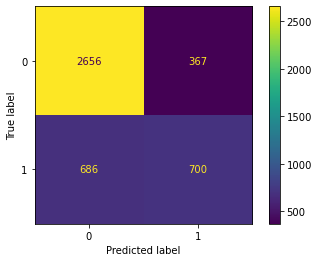



Confusion matrix for the test set
[[658  75]
 [165 205]]


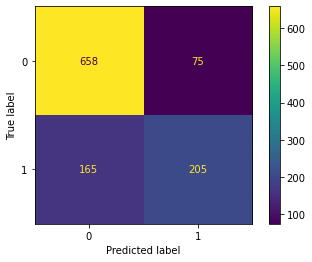

In [395]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

log_model = LogisticRegression() 

#Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)


trans = PowerTransformer()

trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

log_model.fit(X_train_mod, y_train)

y_pred_train_log = log_model.predict(X_train_mod)
y_pred_test_log = log_model.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log,pos_label=0),
                                         recall_score(y_train, y_pred_train_log,pos_label=0)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log,pos_label=0),
                                        recall_score(y_test, y_pred_test_log,pos_label=0)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_mod,y_test, values_format = 'd')
plt.show()

## KNN Model

,Error_metric,Train,Test
0,Accuracy,0.84,0.69
1,Precision,0.87,0.75
2,Recall,0.90,0.80


Confusion matrix for the train set
[[2732  291]
 [ 404  982]]


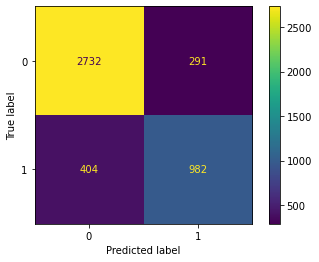



Confusion matrix for the test set
[[589 144]
 [197 173]]


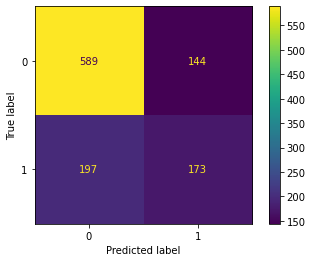

In [396]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=3)


#Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)


trans = PowerTransformer()

trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

knn_model.fit(X_train_mod, y_train)

y_pred_train_log = knn_model.predict(X_train_mod)
y_pred_test_log = knn_model.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log,pos_label=0),
                                         recall_score(y_train, y_pred_train_log,pos_label=0)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log,pos_label=0),
                                        recall_score(y_test, y_pred_test_log,pos_label=0)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(knn_model,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(knn_model,X_test_mod,y_test, values_format = 'd')
plt.show()

- Fit a Decision Tree Classifier on the training data.
- Check the accuracy on the test data.

## Decision Tree

In [397]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import warnings
warnings.filterwarnings('ignore')

,Error_metric,Train,Test
0,Accuracy,0.75,0.75
1,Precision,0.80,0.80
2,Recall,0.84,0.83


Confusion matrix for the train set
[[2198  535]
 [ 434  691]]


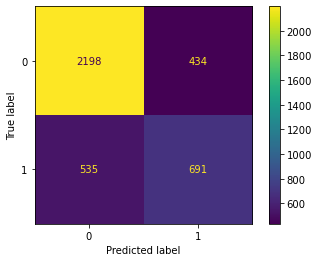



Confusion matrix for the test set
[[935 227]
 [189 303]]


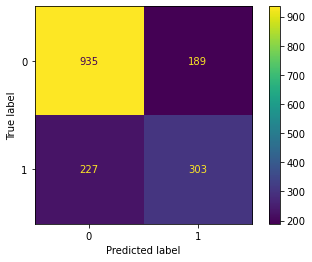

In [398]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=11)

# Bear in mind that sklearn uses a different function for decision trees used for 
# classification ( to predict a categorical feature ): DecisionTreeClassifier() 
dt = DecisionTreeClassifier(max_depth=3)

dt.fit(X_train, y_train)

y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt, pos_label=0),
                                         recall_score(y_train, y_pred_train_dt, pos_label=0)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt, pos_label=0),
                                        recall_score(y_test, y_pred_test_dt, pos_label=0)]})

display(performance_df)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(dt,X_train,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(dt,X_test,y_test, values_format = 'd')
plt.show()

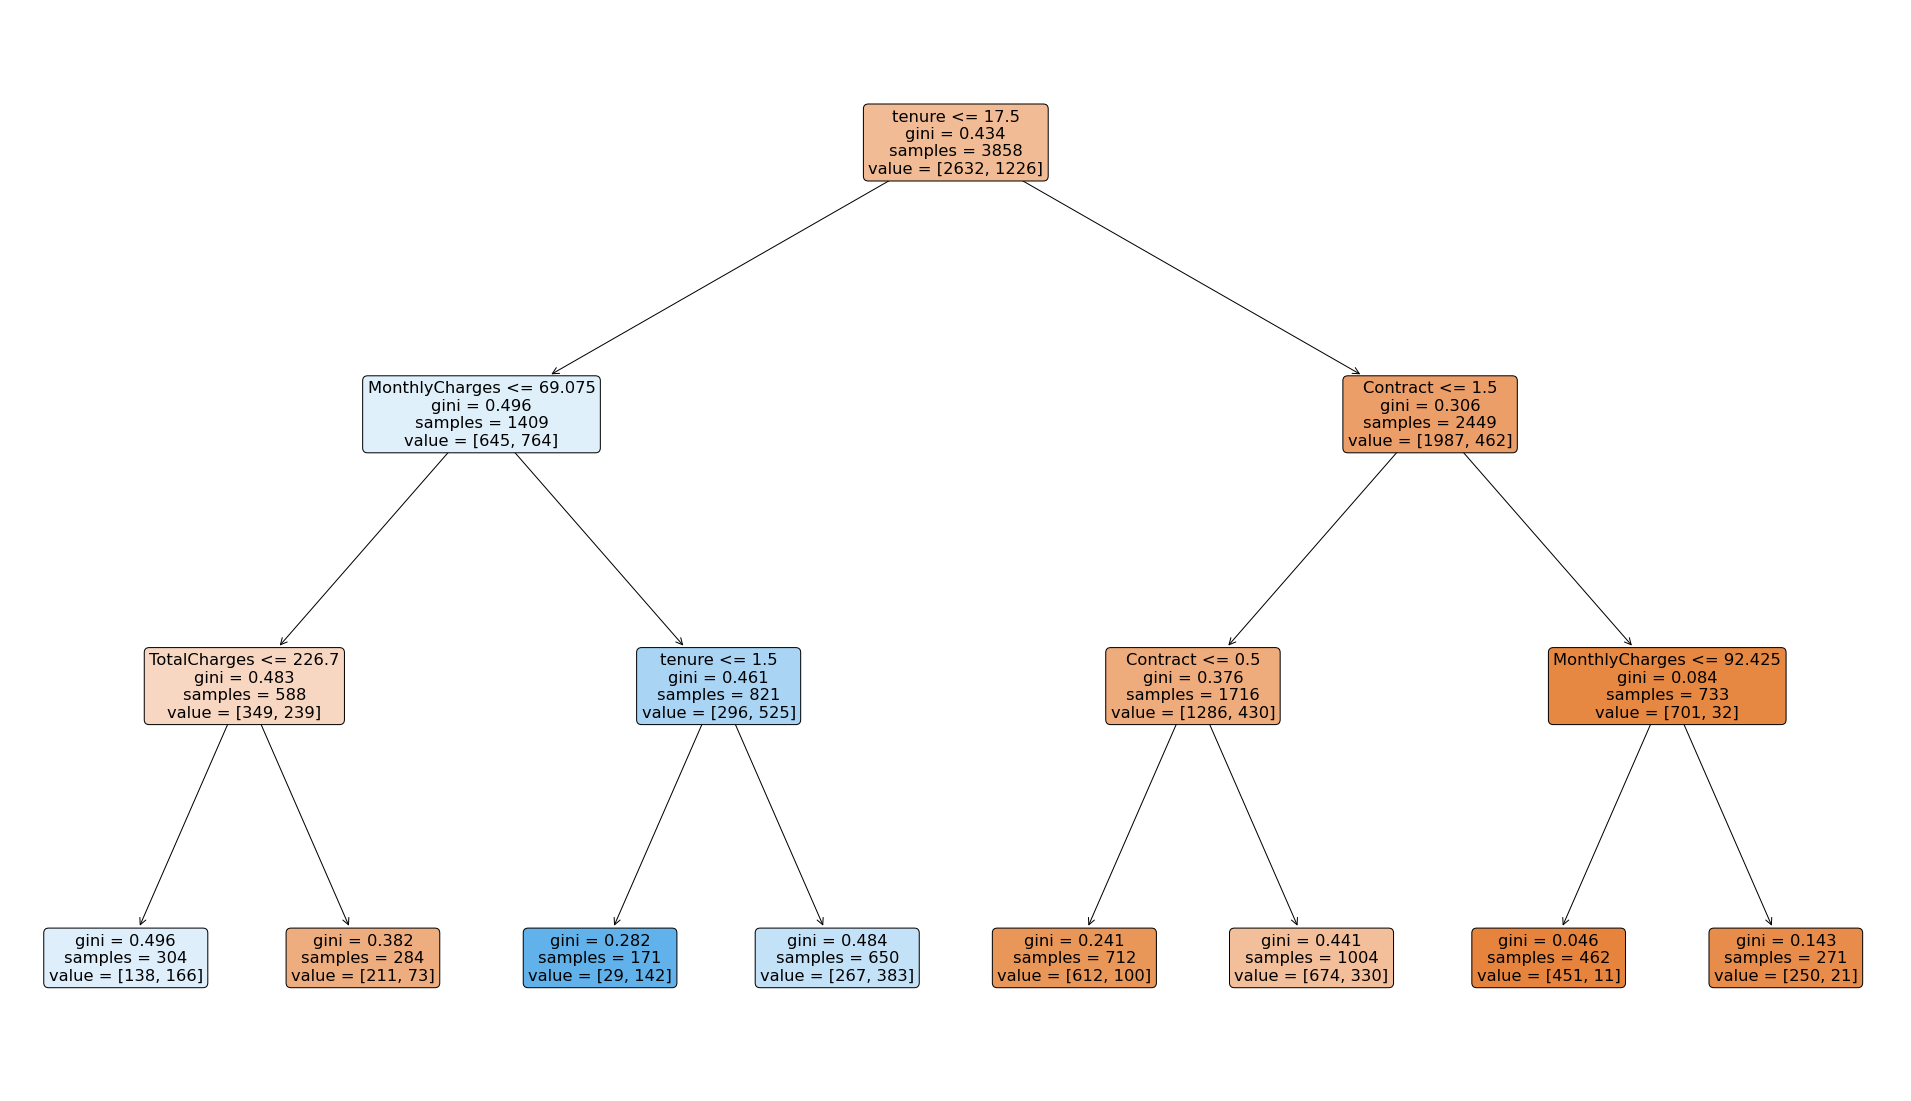

In [399]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (34,20))

plot_tree(dt,filled = True, rounded=True,feature_names=X.columns)
plt.show() 